In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
%matplotlib inline


# Load data

In [2]:
y_score_30_rf = pd.read_csv("plot metric/y_score_30_rf.csv",header = None)
y_score_1y_rf = pd.read_csv("plot metric/y_score_1y_rf.csv",header = None)

y_score_30_linreg = pd.read_csv("plot metric/y_score_30_linreg.csv",header = None)
y_score_1y_linreg = pd.read_csv("plot metric/y_score_1y_linreg.csv",header = None)

y_score_30_logreg = pd.read_csv("plot metric/y_score_30_logreg.csv",header = None)
y_score_1y_logreg = pd.read_csv("plot metric/y_score_1y_logreg.csv",header = None)

y_score_30_simple = pd.read_csv("plot metric/y_score_30_simple.csv")
y_score_1y_simple = pd.read_csv("plot metric/y_score_1y_simple.csv")

y_score_30_vgg = pd.read_csv("plot metric/y_score_30_vgg.csv")
y_score_1y_vgg = pd.read_csv("plot metric/y_score_1y_vgg.csv")

y_score_30_GNB = pd.read_csv("plot metric/y_score_30_GNB.csv",header = None)
y_score_1y_GNB = pd.read_csv("plot metric/y_score_1y_GNB.csv",header = None)

y_score_30_xgtree = pd.read_csv("plot metric/y_score_30_xgboost.csv",header = None)
y_score_1y_xgtree = pd.read_csv("plot metric/y_score_1y_xgboost.csv",header = None)

y_score_30_kNN = pd.read_csv("plot metric/y_score_30_kNN.csv",header = None)
y_score_1y_kNN = pd.read_csv("plot metric/y_score_1y_kNN.csv",header = None)

In [3]:
test_1y = pd.read_csv("data_pp_test_1y.csv")
test_30 = pd.read_csv("data_pp_test_30d.csv")
y_test_1y = test_1y['one_year']
y_test_30 = test_30['thirty_days']

# Plot ROC of different models predicting 1 year mortality.

In [4]:
def plot_ROC(fpr, tpr, auc,name='', title = 'ROC curve'):
    sns.set_style('whitegrid')
#     plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='{}: (AUC = {:.3f})'.format(name,auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    plt.legend(loc='best')
    plt.rcParams.update({'font.size': 18})
#     plt.show()
    pass

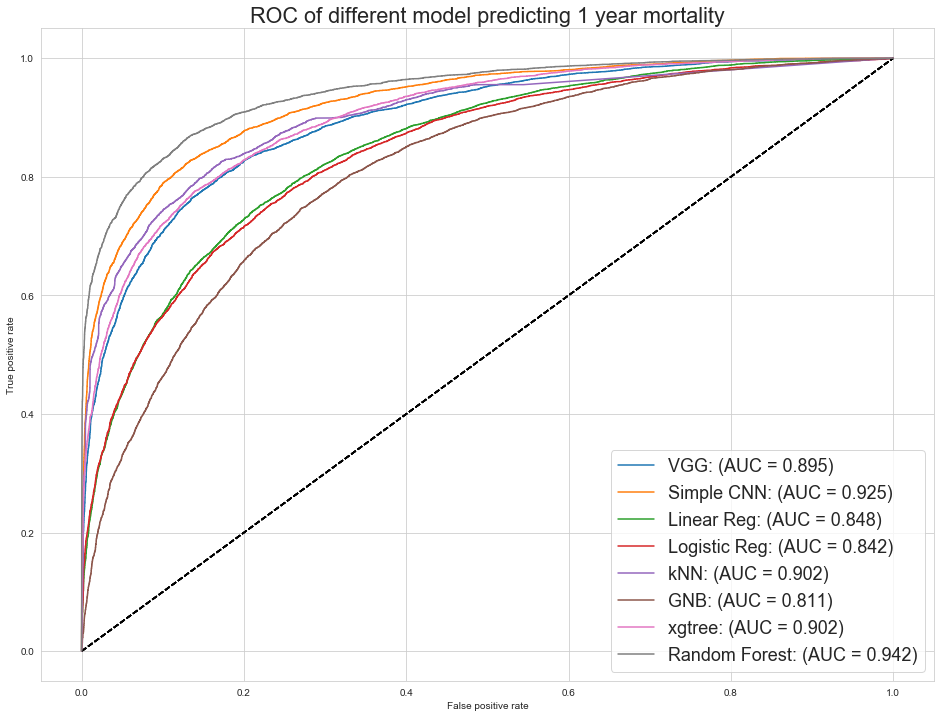

In [5]:

plt.figure(figsize=(16,12))
fpr, tpr, thresholds = metrics.roc_curve(y_test_1y, y_score_1y_vgg)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'VGG')

fpr, tpr, thresholds = metrics.roc_curve(y_test_1y, y_score_1y_simple)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Simple CNN')

fpr, tpr, thresholds = metrics.roc_curve(y_test_1y, y_score_1y_linreg)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Linear Reg')

fpr, tpr, thresholds = metrics.roc_curve(y_test_1y, y_score_1y_logreg)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Logistic Reg')

fpr, tpr, thresholds = metrics.roc_curve(y_test_1y, y_score_1y_kNN)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'kNN')

fpr, tpr, thresholds = metrics.roc_curve(y_test_1y, y_score_1y_GNB)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'GNB')

fpr, tpr, thresholds = metrics.roc_curve(y_test_1y, y_score_1y_xgtree)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'xgtree')

fpr, tpr, thresholds = metrics.roc_curve(y_test_1y, y_score_1y_rf)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Random Forest',title = 'ROC of different model predicting 1 year mortality')

# Plot ROC of different models predicting 30 day mortality.

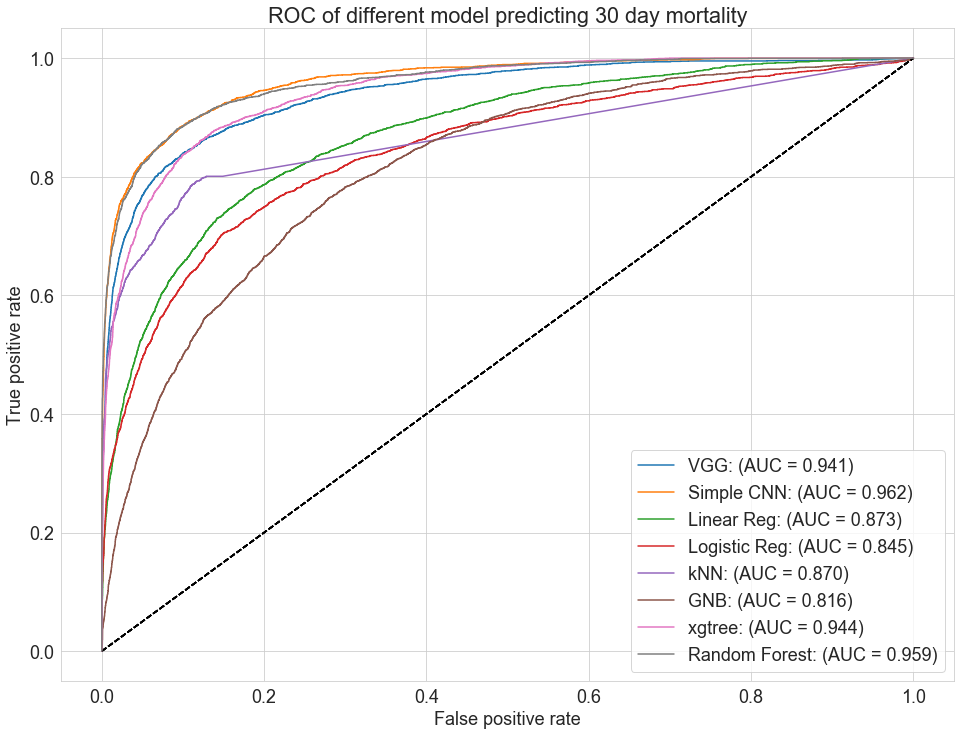

In [6]:
plt.figure(figsize=(16,12))
fpr, tpr, thresholds = metrics.roc_curve(y_test_30, y_score_30_vgg)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'VGG')

fpr, tpr, thresholds = metrics.roc_curve(y_test_30, y_score_30_simple)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Simple CNN')

fpr, tpr, thresholds = metrics.roc_curve(y_test_30, y_score_30_linreg)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Linear Reg')

fpr, tpr, thresholds = metrics.roc_curve(y_test_30, y_score_30_logreg)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Logistic Reg')

fpr, tpr, thresholds = metrics.roc_curve(y_test_30, y_score_30_kNN)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'kNN')

fpr, tpr, thresholds = metrics.roc_curve(y_test_30, y_score_30_GNB)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'GNB')

fpr, tpr, thresholds = metrics.roc_curve(y_test_30, y_score_30_xgtree)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'xgtree')


fpr, tpr, thresholds = metrics.roc_curve(y_test_30, y_score_30_rf)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Random Forest',title = 'ROC of different model predicting 30 day mortality')

# Plot Precision-Recall Curve of different models predicting 1 year mortality.

In [7]:
def plot_PRC(precision, recall, ap, name = '',title= 'Precision-Recall Curve'):
    sns.set_style('whitegrid')
    
#    plt.figure()
    plt.plot(recall, precision, lw=2, label='{}: (AUC = {:.4f})'.format(name,ap))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc='lower left')
    plt.rcParams.update({'font.size': 18})
    return 

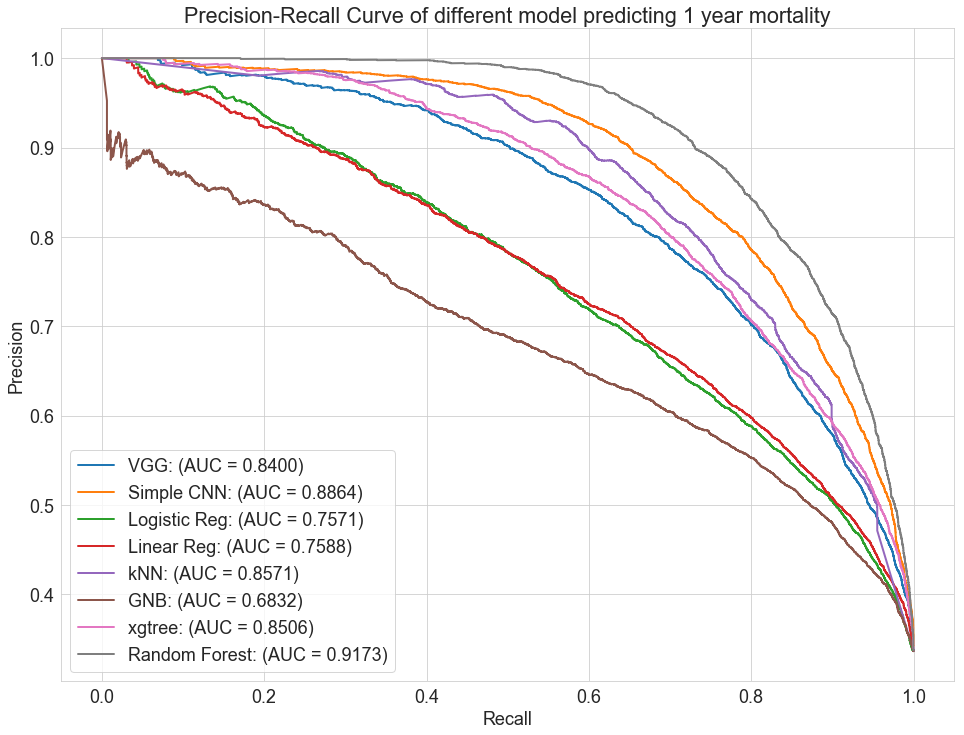

In [8]:
plt.figure(figsize=(16,12))
precision, recall, _ = metrics.precision_recall_curve(y_test_1y, y_score_1y_vgg)
average_precision = metrics.average_precision_score(y_test_1y, y_score_1y_vgg)
plot_PRC(precision, recall, average_precision,name = 'VGG')

precision, recall, _ = metrics.precision_recall_curve(y_test_1y, y_score_1y_simple)
average_precision = metrics.average_precision_score(y_test_1y, y_score_1y_simple)
plot_PRC(precision, recall, average_precision,name = 'Simple CNN')

precision, recall, _ = metrics.precision_recall_curve(y_test_1y, y_score_1y_logreg)
average_precision = metrics.average_precision_score(y_test_1y, y_score_1y_logreg)
plot_PRC(precision, recall, average_precision,name = 'Logistic Reg')

precision, recall, _ = metrics.precision_recall_curve(y_test_1y, y_score_1y_linreg)
average_precision = metrics.average_precision_score(y_test_1y, y_score_1y_linreg)
plot_PRC(precision, recall, average_precision,name = 'Linear Reg')

precision, recall, _ = metrics.precision_recall_curve(y_test_1y, y_score_1y_kNN)
average_precision = metrics.average_precision_score(y_test_1y, y_score_1y_kNN)
plot_PRC(precision, recall, average_precision,name = 'kNN')

precision, recall, _ = metrics.precision_recall_curve(y_test_1y, y_score_1y_GNB)
average_precision = metrics.average_precision_score(y_test_1y, y_score_1y_GNB)
plot_PRC(precision, recall, average_precision,name = 'GNB')

precision, recall, _ = metrics.precision_recall_curve(y_test_1y, y_score_1y_xgtree)
average_precision = metrics.average_precision_score(y_test_1y, y_score_1y_xgtree)
plot_PRC(precision, recall, average_precision,name = 'xgtree')

precision, recall, _ = metrics.precision_recall_curve(y_test_1y, y_score_1y_rf)
average_precision = metrics.average_precision_score(y_test_1y, y_score_1y_rf)
plot_PRC(precision, recall, average_precision,name = 'Random Forest',title = 'Precision-Recall Curve of different model predicting 1 year mortality')

# Plot Precision-Recall Curve of different models predicting 30 day mortality.

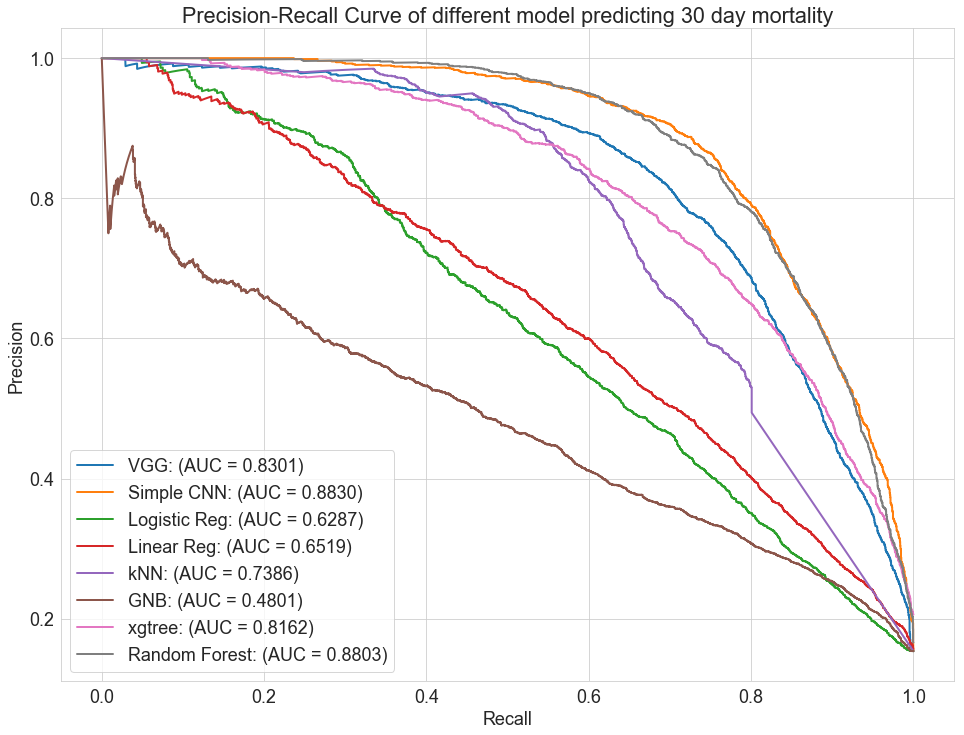

In [9]:
plt.figure(figsize=(16,12))
precision, recall, _ = metrics.precision_recall_curve(y_test_30, y_score_30_vgg)
average_precision = metrics.average_precision_score(y_test_30, y_score_30_vgg)
plot_PRC(precision, recall, average_precision,name = 'VGG')

precision, recall, _ = metrics.precision_recall_curve(y_test_30, y_score_30_simple)
average_precision = metrics.average_precision_score(y_test_30, y_score_30_simple)
plot_PRC(precision, recall, average_precision,name = 'Simple CNN')

precision, recall, _ = metrics.precision_recall_curve(y_test_30, y_score_30_logreg)
average_precision = metrics.average_precision_score(y_test_30, y_score_30_logreg)
plot_PRC(precision, recall, average_precision,name = 'Logistic Reg')

precision, recall, _ = metrics.precision_recall_curve(y_test_30, y_score_30_linreg)
average_precision = metrics.average_precision_score(y_test_30, y_score_30_linreg)
plot_PRC(precision, recall, average_precision,name = 'Linear Reg')

precision, recall, _ = metrics.precision_recall_curve(y_test_30, y_score_30_kNN)
average_precision = metrics.average_precision_score(y_test_30, y_score_30_kNN)
plot_PRC(precision, recall, average_precision,name = 'kNN')

precision, recall, _ = metrics.precision_recall_curve(y_test_30, y_score_30_GNB)
average_precision = metrics.average_precision_score(y_test_30, y_score_30_GNB)
plot_PRC(precision, recall, average_precision,name = 'GNB')

precision, recall, _ = metrics.precision_recall_curve(y_test_30, y_score_30_xgtree)
average_precision = metrics.average_precision_score(y_test_30, y_score_30_xgtree)
plot_PRC(precision, recall, average_precision,name = 'xgtree')

precision, recall, _ = metrics.precision_recall_curve(y_test_30, y_score_30_rf)
average_precision = metrics.average_precision_score(y_test_30, y_score_30_rf)
plot_PRC(precision, recall, average_precision,name = 'Random Forest',title = 'Precision-Recall Curve of different model predicting 30 day mortality')

# Confusion matrix

In [16]:
def probability_to_label(probabilities, threshold=0.5):
    probabilities = list(probabilities)
    th = threshold
    predictions = [1 if i > th else 0 for i in probabilities]
    return predictions

def plot_cm(y_test, y_score, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    y_pred = probability_to_label(y_score, threshold=0.5)
    
    sns.set_style('white')
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normarlize 
    
    from sklearn.utils.multiclass import unique_labels
    classes = unique_labels(y_test, y_pred)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.rcParams.update({'font.size': 10})
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    

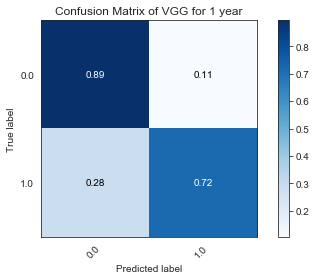

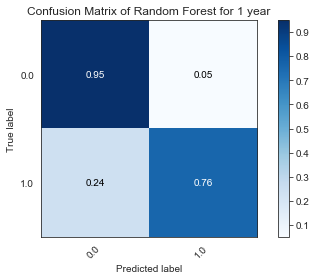

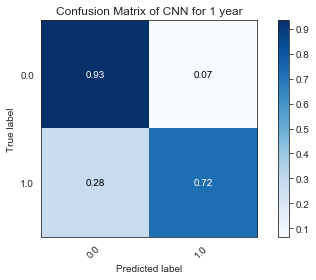

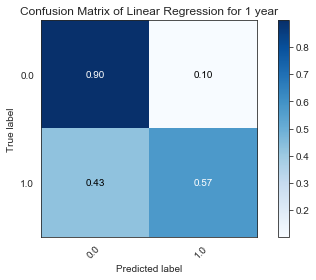

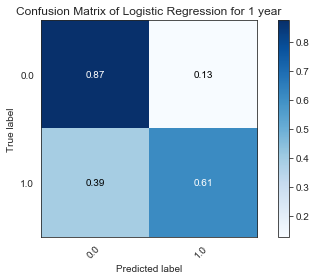

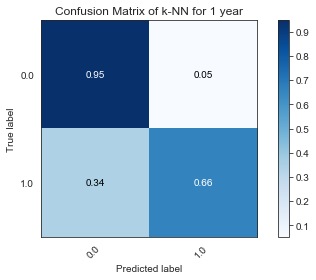

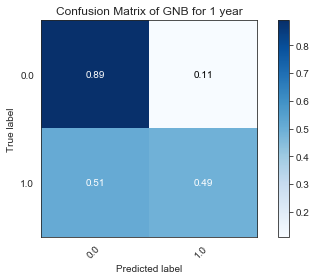

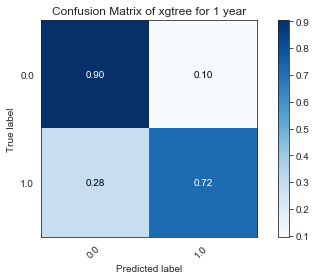

In [17]:
y_pred_1y_vgg = probability_to_label(y_score_1y_vgg.values, threshold=0.5)
plot_cm(y_test_1y, y_pred_1y_vgg,title = 'Confusion Matrix of VGG for 1 year')

y_pred_1y_rf = probability_to_label(y_score_1y_rf.values, threshold=0.5)
plot_cm(y_test_1y, y_pred_1y_rf,title = 'Confusion Matrix of Random Forest for 1 year')

y_pred_1y_simple = probability_to_label(y_score_1y_simple.values, threshold=0.5)
plot_cm(y_test_1y, y_pred_1y_simple,title = 'Confusion Matrix of CNN for 1 year')

y_pred_1y_linreg = probability_to_label(y_score_1y_linreg.values, threshold=0.5)
plot_cm(y_test_1y, y_pred_1y_linreg,title = 'Confusion Matrix of Linear Regression for 1 year')

y_pred_1y_logreg = probability_to_label(y_score_1y_logreg.values, threshold=0.5)
plot_cm(y_test_1y, y_pred_1y_logreg,title = 'Confusion Matrix of Logistic Regression for 1 year')

y_pred_1y_kNN = probability_to_label(y_score_1y_kNN.values, threshold=0.5)
plot_cm(y_test_1y, y_pred_1y_kNN,title = 'Confusion Matrix of k-NN for 1 year')

y_pred_1y_GNB = probability_to_label(y_score_1y_GNB.values, threshold=0.5)
plot_cm(y_test_1y, y_pred_1y_GNB,title = 'Confusion Matrix of GNB for 1 year')

y_pred_1y_xgtree = probability_to_label(y_score_1y_xgtree.values, threshold=0.5)
plot_cm(y_test_1y, y_pred_1y_xgtree,title = 'Confusion Matrix of xgtree for 1 year')

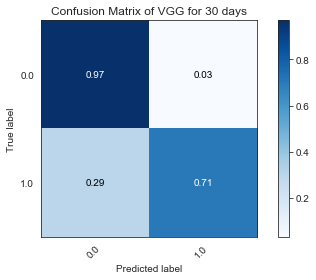

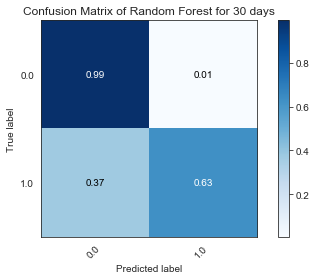

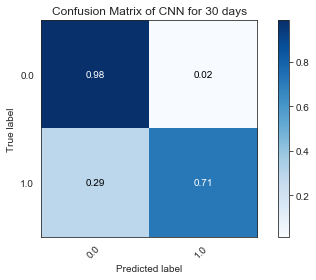

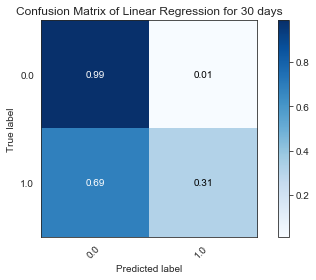

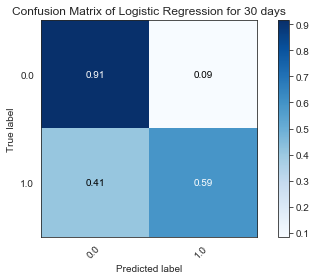

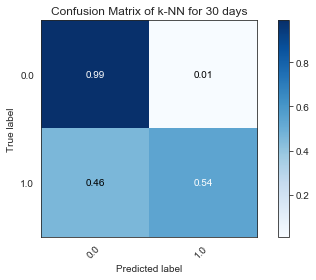

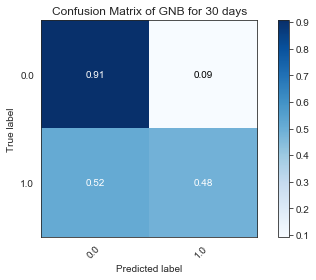

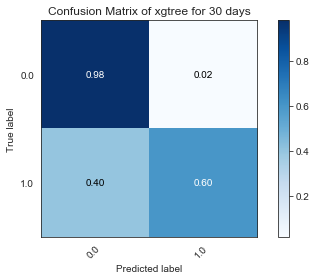

In [18]:
y_pred_30_vgg = probability_to_label(y_score_30_vgg.values, threshold=0.5)
plot_cm(y_test_30, y_pred_30_vgg,title = 'Confusion Matrix of VGG for 30 days')

y_pred_30_rf = probability_to_label(y_score_30_rf.values, threshold=0.5)
plot_cm(y_test_30, y_pred_30_rf,title = 'Confusion Matrix of Random Forest for 30 days')

y_pred_30_simple = probability_to_label(y_score_30_simple.values, threshold=0.5)
plot_cm(y_test_30, y_pred_30_simple,title = 'Confusion Matrix of CNN for 30 days')

y_pred_30_linreg = probability_to_label(y_score_30_linreg.values, threshold=0.5)
plot_cm(y_test_30, y_pred_30_linreg,title = 'Confusion Matrix of Linear Regression for 30 days')

y_pred_30_logreg = probability_to_label(y_score_30_logreg.values, threshold=0.5)
plot_cm(y_test_30, y_pred_30_logreg,title = 'Confusion Matrix of Logistic Regression for 30 days')

y_pred_30_kNN = probability_to_label(y_score_30_kNN.values, threshold=0.5)
plot_cm(y_test_30, y_pred_30_kNN,title = 'Confusion Matrix of k-NN for 30 days')

y_pred_30_GNB = probability_to_label(y_score_30_GNB.values, threshold=0.5)
plot_cm(y_test_30, y_pred_30_GNB,title = 'Confusion Matrix of GNB for 30 days')

y_pred_30_xgtree = probability_to_label(y_score_30_xgtree.values, threshold=0.5)
plot_cm(y_test_30, y_pred_30_xgtree,title = 'Confusion Matrix of xgtree for 30 days')
